In [17]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [18]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [19]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [20]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [34]:
tox_list1=[ 'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
             'smiles_r']

tox_list=[   'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative']  

In [35]:
our_data=toxcast.reindex(columns=tox_list)

In [36]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def ErGFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetErGFingerprint(x))



In [38]:
from sklearn.feature_selection import VarianceThreshold



In [39]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [40]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [41]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [42]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [43]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [44]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


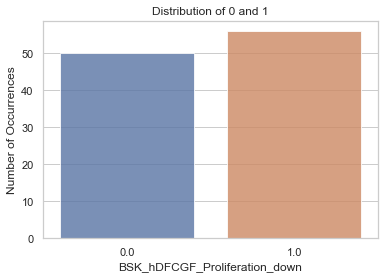

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


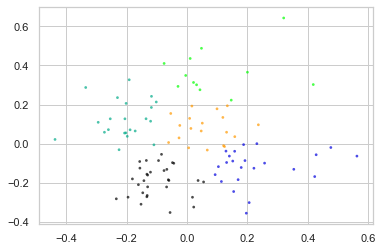

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


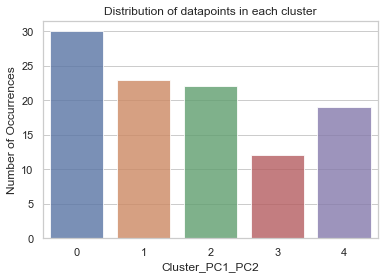

Total Selected CP features:  62
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.6min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 0 22]
 [ 0  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.13      0.50      0.21        30
weighted avg       0.07      0.27      0.11        30



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected CP features:  49
Total Selected train:  83
Total Selected test:  23
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 8]
 [1 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        17
         1.0       0.38      0.83      0.53         6

    accuracy                           0.61        23
   macro avg       0.64      0.68      0.60        23
weighted avg       0.77      0.61      0.63        23

Total Selected CP features:  269
Total Selected train:  84
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1  0]
 [16  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.06      1.00      0.11         1
         1.0       1.00      0.24      0.38        21

    accuracy                           0.27        22
   macro avg       0.53      0.62      0.25        22
weighted avg       0.96      0.27      0.37        22

Total Selected CP features:  125
Total Selected train:  87

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 3]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         9
         1.0       0.57      0.40      0.47        10

    accuracy                           0.53        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.54      0.53      0.52        19

Total Selected CP features:  31
Total Selected train:  94
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 0]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         1
         1.0       1.00      0.64      0.78        11

    accuracy                           0.67        12
   macro avg       0.60      0.82      0.56        12
weighted avg       0.93      0.67      0.74        12



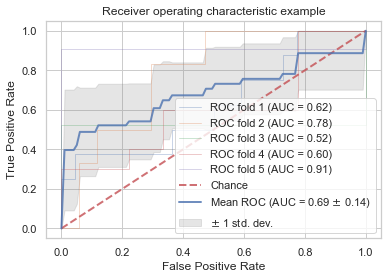

Mean of Each fold


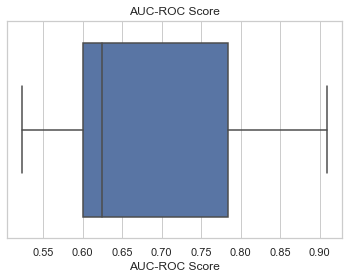

AUC-ROC all:  [0.625, 0.7843137254901961, 0.5238095238095238, 0.6, 0.9090909090909091]
AUC-ROC = 0.69 ± 0.14)


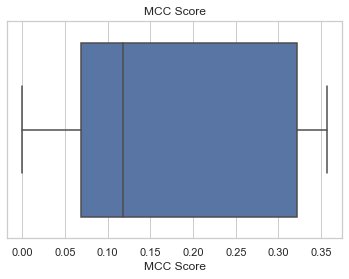

Matthews_corrcoef all:  [0.0, 0.3213142318599921, 0.11834526708278771, 0.06900655593423542, 0.3567530340063379]
Matthews_corrcoef = 0.173 ± 0.141)


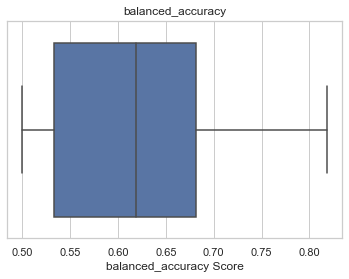

balanced_accuracy all:  [0.5, 0.6813725490196079, 0.6190476190476191, 0.5333333333333333, 0.8181818181818181]
balanced_accuracy = 0.63 ± 0.11)


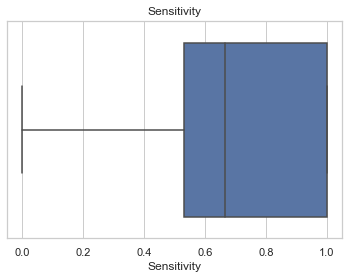

Sensitivity all:  [0.0, 0.5294117647058824, 1.0, 0.6666666666666666, 1.0]
Sensitivity = 0.64 ± 0.37)


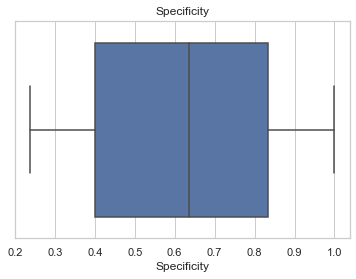

Specificity all:  [1.0, 0.8333333333333334, 0.23809523809523808, 0.4, 0.6363636363636364]
Specificity = 0.62 ± 0.28)
One Combined Confusion Matrix
conf_matrix: 
  [[17 33]
 [27 29]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.39      0.34      0.36        50
         1.0       0.47      0.52      0.49        56

    accuracy                           0.43       106
   macro avg       0.43      0.43      0.43       106
weighted avg       0.43      0.43      0.43       106

matthews_corrcoef
-0.14400642644971995
balanced_accuracy_score
0.42892857142857144
Sensitivity
0.34
Specificity
0.5178571428571429
AUC-ROC for the combined results: 


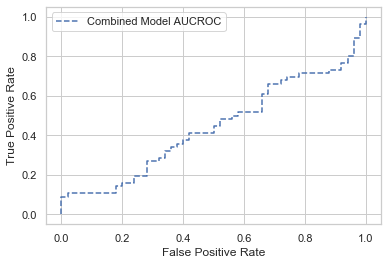

Combined Model AUC ROC:  0.44214285714285706
Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


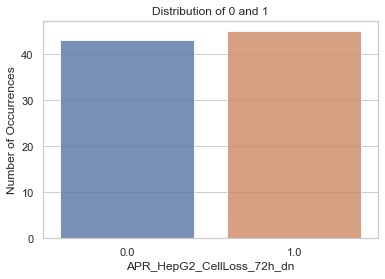

Total Compounds in Assay:  88
88
88
pca explained variance by first two components:  0.7196696700655922


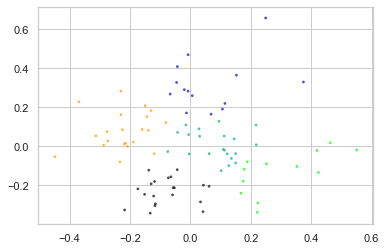

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


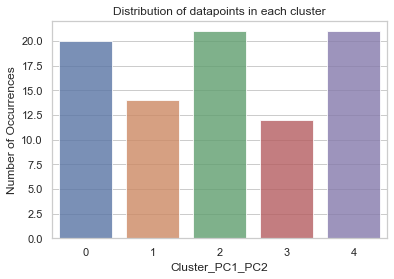

Total Selected CP features:  246
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [15  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.17      1.00      0.29         3
         1.0       1.00      0.17      0.29        18

    accuracy                           0.29        21
   macro avg       0.58      0.58      0.29        21
weighted avg       0.88      0.29      0.29        21

Total Selected CP features:  92
Total Selected train:  67


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 6]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.50      0.55        12
         1.0       0.45      0.56      0.50         9

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.54      0.52      0.53        21

Total Selected CP features:  41
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 9]
 [1 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.89      0.47      0.62        17
         1.0       0.18      0.67      0.29         3

    accuracy                           0.50        20
   macro avg       0.54      0.57      0.45        20
weighted avg       0.78      0.50      0.57        20

Total Selected CP features:  44
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 2]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      0.33      0.25         3
         1.0       0.78      0.64      0.70        11

    accuracy                           0.57        14
   macro avg       0.49      0.48      0.48        14
weighted avg       0.65      0.57      0.60        14

Total Selected CP features:  83
Total Selected train:  76

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [1 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.75      0.80         8
         1.0       0.60      0.75      0.67         4

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



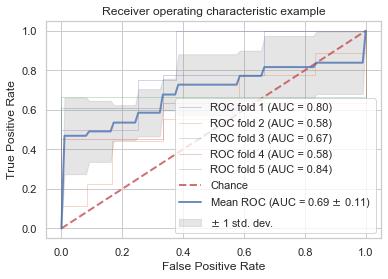

Mean of Each fold


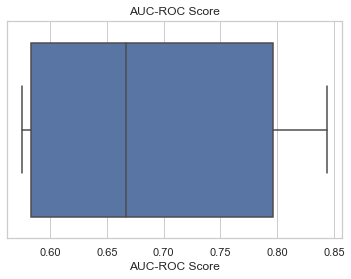

AUC-ROC all:  [0.7962962962962963, 0.5833333333333334, 0.6666666666666666, 0.5757575757575758, 0.84375]
AUC-ROC = 0.69 ± 0.11)


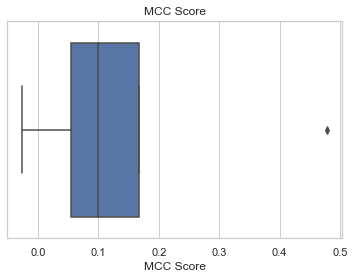

Matthews_corrcoef all:  [0.16666666666666666, 0.05504818825631803, 0.09851341054817479, -0.025949964805384102, 0.47809144373375745]
Matthews_corrcoef = 0.154 ± 0.173)


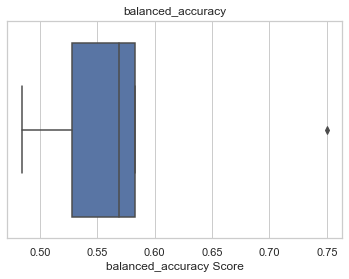

balanced_accuracy all:  [0.5833333333333334, 0.5277777777777778, 0.5686274509803921, 0.48484848484848486, 0.75]
balanced_accuracy = 0.58 ± 0.09)


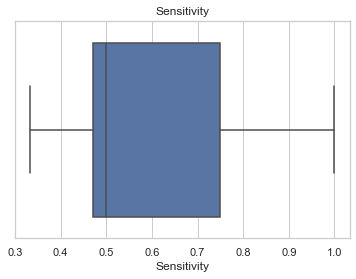

Sensitivity all:  [1.0, 0.5, 0.47058823529411764, 0.3333333333333333, 0.75]
Sensitivity = 0.61 ± 0.24)


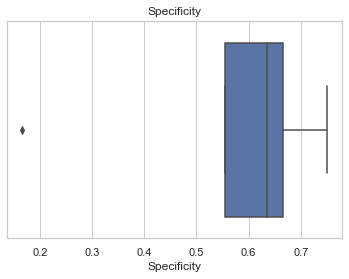

Specificity all:  [0.16666666666666666, 0.5555555555555556, 0.6666666666666666, 0.6363636363636364, 0.75]
Specificity = 0.56 ± 0.20)
One Combined Confusion Matrix
conf_matrix: 
  [[24 19]
 [25 20]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.56      0.52        43
         1.0       0.51      0.44      0.48        45

    accuracy                           0.50        88
   macro avg       0.50      0.50      0.50        88
weighted avg       0.50      0.50      0.50        88

matthews_corrcoef
0.002600154630593495
balanced_accuracy_score
0.5012919896640826
Sensitivity
0.5581395348837209
Specificity
0.4444444444444444
AUC-ROC for the combined results: 


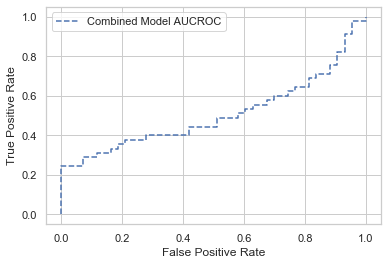

Combined Model AUC ROC:  0.5069767441860464
Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


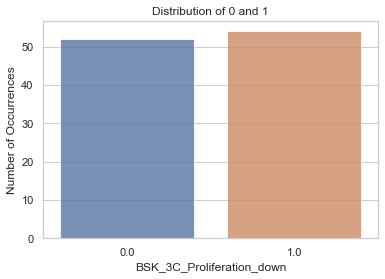

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


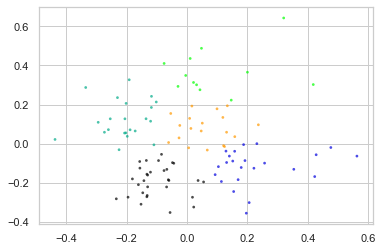

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


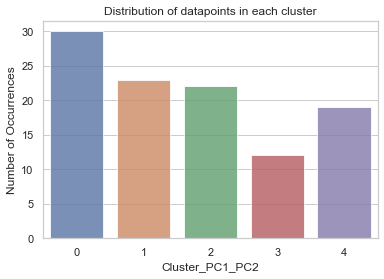

Total Selected CP features:  82
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5 13]
 [ 1 11]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.28      0.42        18
         1.0       0.46      0.92      0.61        12

    accuracy                           0.53        30
   macro avg       0.65      0.60      0.51        30
weighted avg       0.68      0.53      0.49        30

Total Selected CP features:  55
Total Selected tra

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  5]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79        18
         1.0       0.38      0.60      0.46         5

    accuracy                           0.70        23
   macro avg       0.62      0.66      0.62        23
weighted avg       0.76      0.70      0.72        23

Total Selected CP features:  172
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  0]
 [ 9 11]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.18      1.00      0.31         2
         1.0       1.00      0.55      0.71        20

    accuracy                           0.59        22
   macro avg       0.59      0.78      0.51        22
weighted avg       0.93      0.59      0.67        22

Total Selected CP features:  60
Total Selected train:  87
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.56      0.71      0.63         7

    accuracy                           0.68        19
   macro avg       0.68      0.69      0.68        19
weighted avg       0.71      0.68      0.69        19

Total Selected CP features:  25
Total Selected train:  94
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[2 0]
 [3 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         2
         1.0       1.00      0.70      0.82        10

    accuracy                           0.75        12
   macro avg       0.70      0.85      0.70        12
weighted avg       0.90      0.75      0.78        12



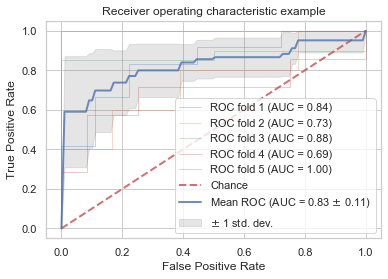

Mean of Each fold


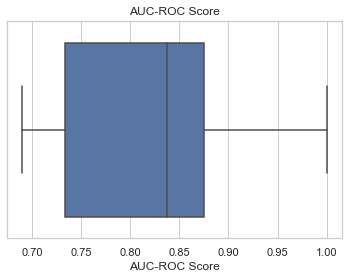

AUC-ROC all:  [0.8379629629629629, 0.7333333333333333, 0.875, 0.6904761904761905, 1.0]
AUC-ROC = 0.83 ± 0.11)


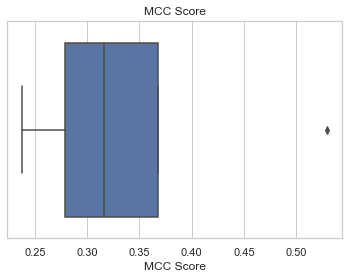

Matthews_corrcoef all:  [0.2381448361039201, 0.2790526301083191, 0.31622776601683794, 0.3680349649825889, 0.5291502622129182]
Matthews_corrcoef = 0.346 ± 0.101)


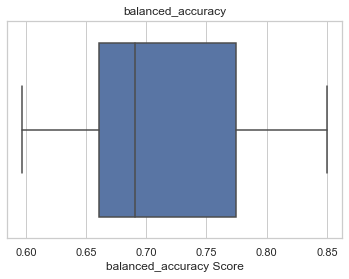

balanced_accuracy all:  [0.5972222222222222, 0.6611111111111111, 0.775, 0.6904761904761905, 0.85]
balanced_accuracy = 0.71 ± 0.09)


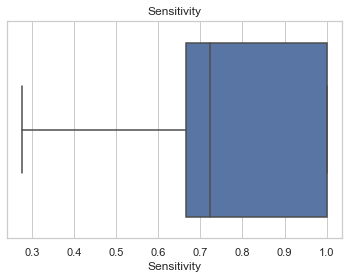

Sensitivity all:  [0.2777777777777778, 0.7222222222222222, 1.0, 0.6666666666666666, 1.0]
Sensitivity = 0.73 ± 0.27)


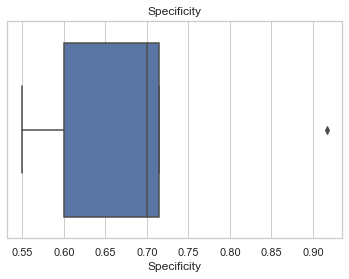

Specificity all:  [0.9166666666666666, 0.6, 0.55, 0.7142857142857143, 0.7]
Specificity = 0.70 ± 0.13)
One Combined Confusion Matrix
conf_matrix: 
  [[30 22]
 [17 37]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        52
         1.0       0.63      0.69      0.65        54

    accuracy                           0.63       106
   macro avg       0.63      0.63      0.63       106
weighted avg       0.63      0.63      0.63       106

matthews_corrcoef
0.26375720246201456
balanced_accuracy_score
0.6310541310541311
Sensitivity
0.5769230769230769
Specificity
0.6851851851851852
AUC-ROC for the combined results: 


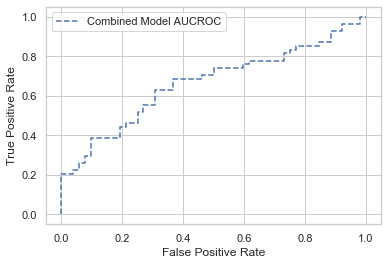

Combined Model AUC ROC:  0.6638176638176638
Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


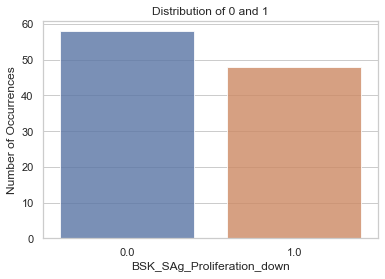

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


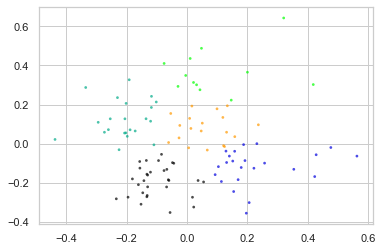

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


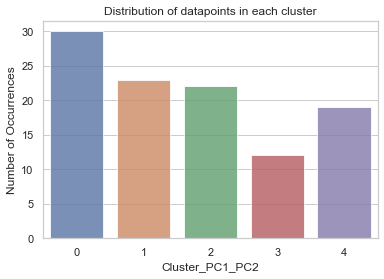

Total Selected CP features:  81
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 7 16]
 [ 0  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.30      0.47        23
         1.0       0.30      1.00      0.47         7

    accuracy                           0.47        30
   macro avg       0.65      0.65      0.47        30
weighted avg       0.84      0.47      0.47        30

Total Selected CP features:  129
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  4]
 [ 1  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.84        17
         1.0       0.56      0.83      0.67         6

    accuracy                           0.78        23
   macro avg       0.74      0.80      0.75        23
weighted avg       0.83      0.78      0.79        23

Total Selected CP features:  357
Total Selected train:  84


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4  0]
 [16  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         4
         1.0       1.00      0.11      0.20        18

    accuracy                           0.27        22
   macro avg       0.60      0.56      0.27        22
weighted avg       0.85      0.27      0.22        22

Total Selected CP features:  183
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.38      0.43      0.40         7

    accuracy                           0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.54      0.53      0.53        19

Total Selected CP features:  116
Total Selected train:  94


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 1]
 [4 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      0.50      0.29         2
         1.0       0.86      0.60      0.71        10

    accuracy                           0.58        12
   macro avg       0.53      0.55      0.50        12
weighted avg       0.75      0.58      0.64        12



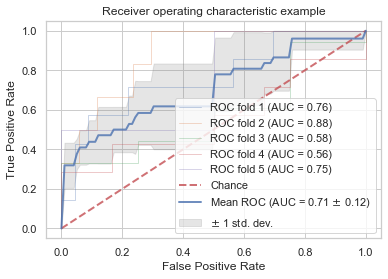

Mean of Each fold


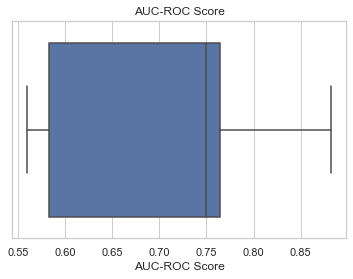

AUC-ROC all:  [0.7639751552795031, 0.8823529411764706, 0.5833333333333333, 0.5595238095238095, 0.75]
AUC-ROC = 0.71 ± 0.12)


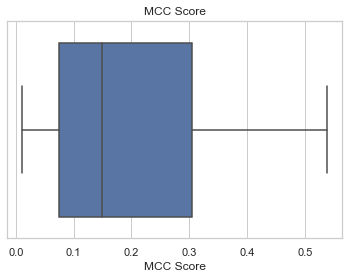

Matthews_corrcoef all:  [0.30434782608695654, 0.5380770594253792, 0.14907119849998599, 0.011631052629980886, 0.07559289460184544]
Matthews_corrcoef = 0.216 ± 0.188)


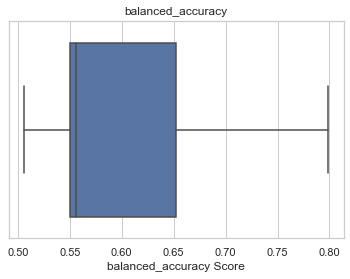

balanced_accuracy all:  [0.6521739130434783, 0.7990196078431373, 0.5555555555555556, 0.5059523809523809, 0.55]
balanced_accuracy = 0.61 ± 0.10)


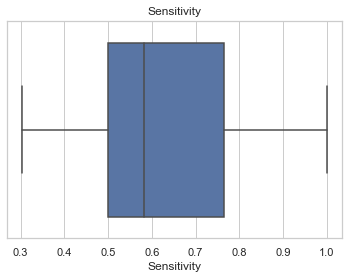

Sensitivity all:  [0.30434782608695654, 0.7647058823529411, 1.0, 0.5833333333333334, 0.5]
Sensitivity = 0.63 ± 0.24)


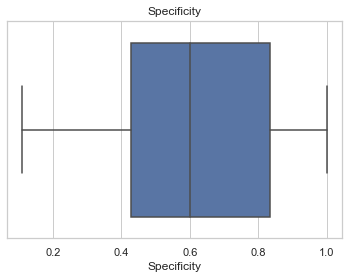

Specificity all:  [1.0, 0.8333333333333334, 0.1111111111111111, 0.42857142857142855, 0.6]
Specificity = 0.59 ± 0.31)
One Combined Confusion Matrix
conf_matrix: 
  [[32 26]
 [25 23]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.55      0.56        58
         1.0       0.47      0.48      0.47        48

    accuracy                           0.52       106
   macro avg       0.52      0.52      0.52       106
weighted avg       0.52      0.52      0.52       106

matthews_corrcoef
0.0308409940768303
balanced_accuracy_score
0.5154454022988506
Sensitivity
0.5517241379310345
Specificity
0.4791666666666667
AUC-ROC for the combined results: 


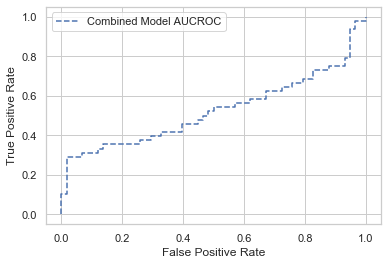

Combined Model AUC ROC:  0.5244252873563219
Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


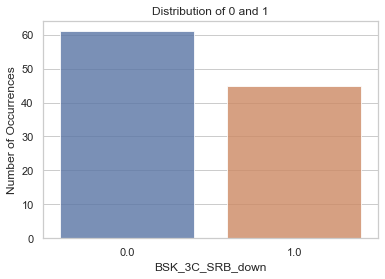

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


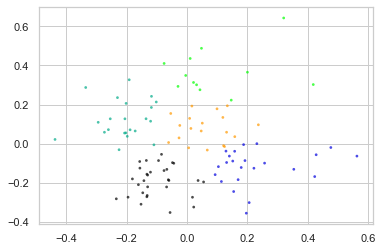

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


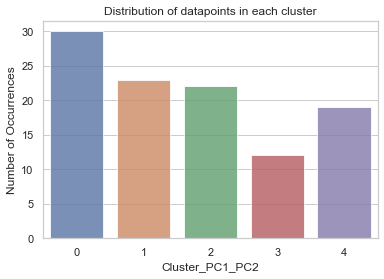

Total Selected CP features:  30
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5 17]
 [ 2  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.23      0.34        22
         1.0       0.26      0.75      0.39         8

    accuracy                           0.37        30
   macro avg       0.49      0.49      0.37        30
weighted avg       0.59      0.37      0.36        30

Total Selected CP features:  18
Total Selected train:  83
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        19
         1.0       0.50      0.75      0.60         4

    accuracy                           0.83        23
   macro avg       0.72      0.80      0.74        23
weighted avg       0.86      0.83      0.84        23

Total Selected CP features:  125
Total Selected train:  84

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [17  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.15      1.00      0.26         3
         1.0       1.00      0.11      0.19        19

    accuracy                           0.23        22
   macro avg       0.57      0.55      0.23        22
weighted avg       0.88      0.23      0.20        22

Total Selected CP features:  25
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.38      0.43      0.40         7

    accuracy                           0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.54      0.53      0.53        19

Total Selected CP features:  22
Total Selected train:  9

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



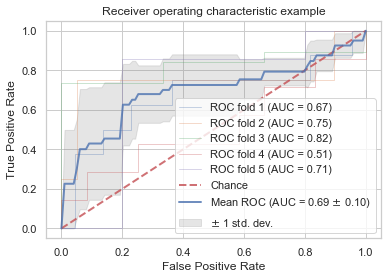

Mean of Each fold


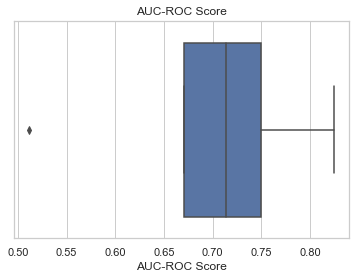

AUC-ROC all:  [0.6704545454545454, 0.75, 0.8245614035087719, 0.5119047619047619, 0.7142857142857143]
AUC-ROC = 0.69 ± 0.10)


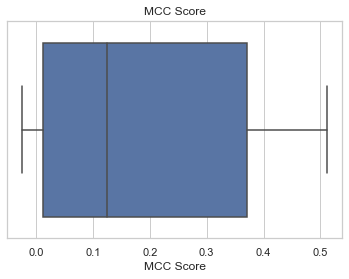

Matthews_corrcoef all:  [-0.023762422826087874, 0.5110997067272864, 0.12565617248750865, 0.011631052629980886, 0.37142857142857144]
Matthews_corrcoef = 0.199 ± 0.208)


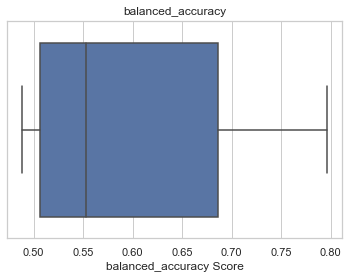

balanced_accuracy all:  [0.48863636363636365, 0.7960526315789473, 0.5526315789473684, 0.5059523809523809, 0.6857142857142857]
balanced_accuracy = 0.61 ± 0.12)


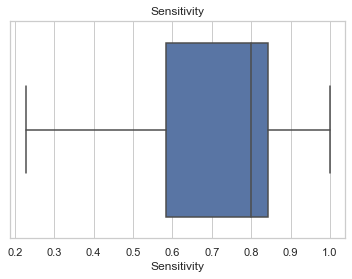

Sensitivity all:  [0.22727272727272727, 0.8421052631578947, 1.0, 0.5833333333333334, 0.8]
Sensitivity = 0.69 ± 0.27)


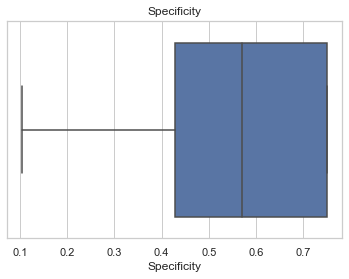

Specificity all:  [0.75, 0.75, 0.10526315789473684, 0.42857142857142855, 0.5714285714285714]
Specificity = 0.52 ± 0.24)
One Combined Confusion Matrix
conf_matrix: 
  [[35 26]
 [27 18]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.57      0.57        61
         1.0       0.41      0.40      0.40        45

    accuracy                           0.50       106
   macro avg       0.49      0.49      0.49       106
weighted avg       0.50      0.50      0.50       106

matthews_corrcoef
-0.026311108108252306
balanced_accuracy_score
0.48688524590163934
Sensitivity
0.5737704918032787
Specificity
0.4
AUC-ROC for the combined results: 


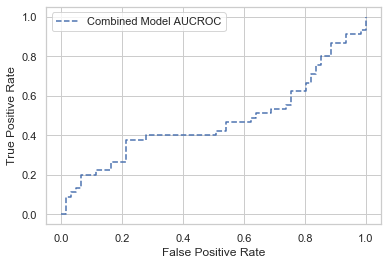

Combined Model AUC ROC:  0.4710382513661202
Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


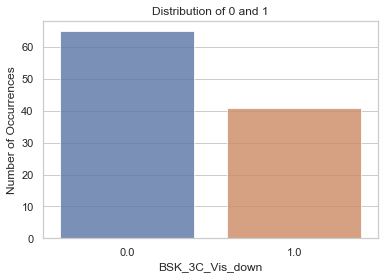

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


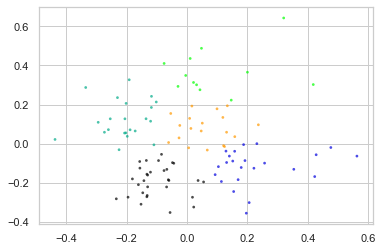

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


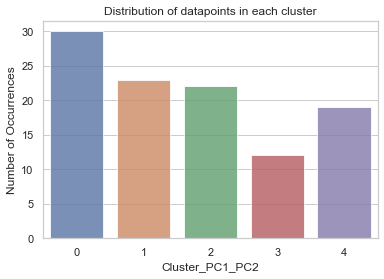

Total Selected CP features:  87
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  9]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.61      0.72        23
         1.0       0.36      0.71      0.48         7

    accuracy                           0.63        30
   macro avg       0.62      0.66      0.60        30
weighted avg       0.75      0.63      0.66        30

Total Selected CP features:  142
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 0  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        19
         1.0       0.57      1.00      0.73         4

    accuracy                           0.87        23
   macro avg       0.79      0.92      0.82        23
weighted avg       0.93      0.87      0.88        23

Total Selected CP features:  430
Total Selected train:  84


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  1]
 [13  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.19      0.75      0.30         4
         1.0       0.83      0.28      0.42        18

    accuracy                           0.36        22
   macro avg       0.51      0.51      0.36        22
weighted avg       0.72      0.36      0.40        22

Total Selected CP features:  119
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        14
         1.0       0.40      0.40      0.40         5

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68      0.68        19

Total Selected CP features:  125
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



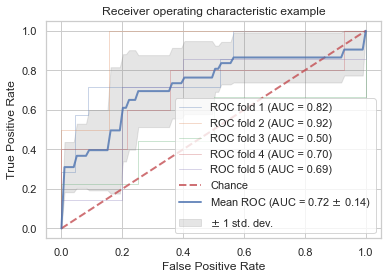

Mean of Each fold


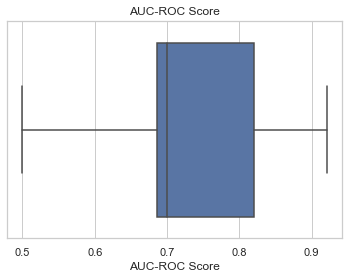

AUC-ROC all:  [0.8198757763975155, 0.9210526315789473, 0.5, 0.7, 0.6857142857142857]
AUC-ROC = 0.73 ± 0.14)


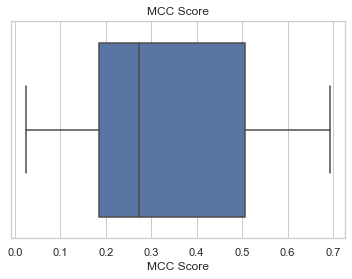

Matthews_corrcoef all:  [0.27382077571623753, 0.693687975619296, 0.024056261216234408, 0.18571428571428572, 0.50709255283711]
Matthews_corrcoef = 0.337 ± 0.237)


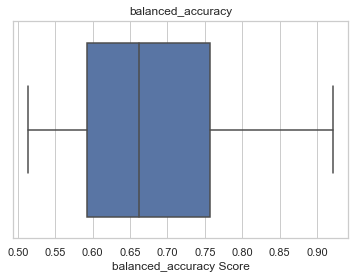

balanced_accuracy all:  [0.6614906832298137, 0.9210526315789473, 0.5138888888888888, 0.5928571428571429, 0.7571428571428571]
balanced_accuracy = 0.69 ± 0.14)


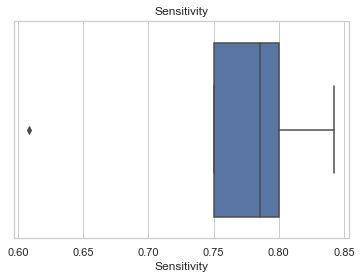

Sensitivity all:  [0.6086956521739131, 0.8421052631578947, 0.75, 0.7857142857142857, 0.8]
Sensitivity = 0.76 ± 0.08)


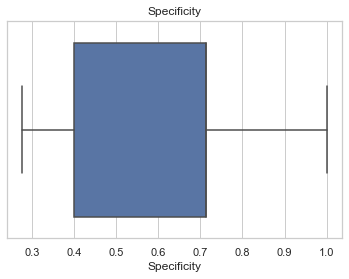

Specificity all:  [0.7142857142857143, 1.0, 0.2777777777777778, 0.4, 0.7142857142857143]
Specificity = 0.62 ± 0.26)
One Combined Confusion Matrix
conf_matrix: 
  [[48 17]
 [20 21]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.74      0.72        65
         1.0       0.55      0.51      0.53        41

    accuracy                           0.65       106
   macro avg       0.63      0.63      0.63       106
weighted avg       0.65      0.65      0.65       106

matthews_corrcoef
0.254554981953514
balanced_accuracy_score
0.625328330206379
Sensitivity
0.7384615384615385
Specificity
0.5121951219512195
AUC-ROC for the combined results: 


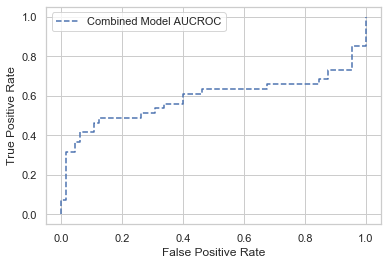

Combined Model AUC ROC:  0.5872420262664164
Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


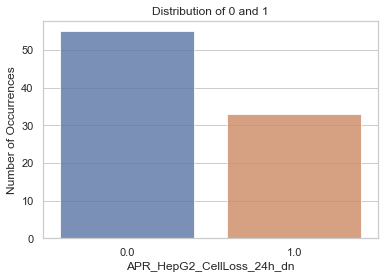

Total Compounds in Assay:  88
88
88
pca explained variance by first two components:  0.7196696700655922


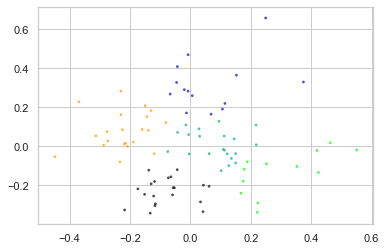

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


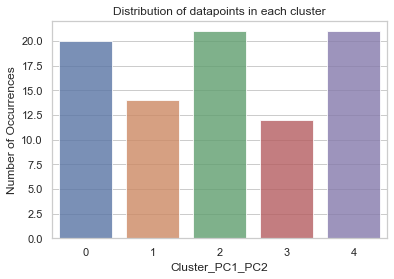

Total Selected CP features:  567
Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.26      1.00      0.42         5
         1.0       1.00      0.12      0.22        16

    accuracy                           0.33        21
   macro avg       0.63      0.56      0.32        21
weighted avg       0.82      0.33      0.27        21

Total Selected CP features:  224
Total Selected train:  67


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  1]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        16
         1.0       0.67      0.40      0.50         5

    accuracy                           0.81        21
   macro avg       0.75      0.67      0.69        21
weighted avg       0.79      0.81      0.79        21

Total Selected CP features:  97
Total Selected train:  68
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  7]
 [ 0  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.61      0.76        18
         1.0       0.22      1.00      0.36         2

    accuracy                           0.65        20
   macro avg       0.61      0.81      0.56        20
weighted avg       0.92      0.65      0.72        20

Total Selected CP features:  47
Total Selected tra

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 0]
 [2 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
         1.0       1.00      0.71      0.83         7

    accuracy                           0.86        14
   macro avg       0.89      0.86      0.85        14
weighted avg       0.89      0.86      0.85        14

Total Selected CP features:  229
Total Selected train:  76
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [2 1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84         9
         1.0       0.50      0.33      0.40         3

    accuracy                           0.75        12
   macro avg       0.65      0.61      0.62        12
weighted avg       0.72      0.75      0.73        12



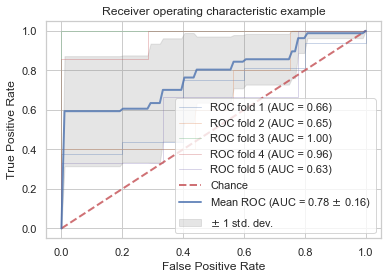

Mean of Each fold


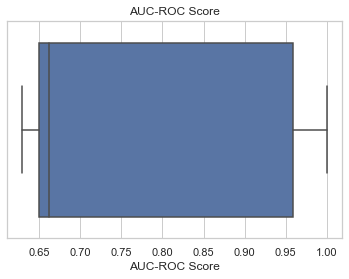

AUC-ROC all:  [0.6625000000000001, 0.65, 1.0, 0.9591836734693877, 0.6296296296296295]
AUC-ROC = 0.78 ± 0.16)


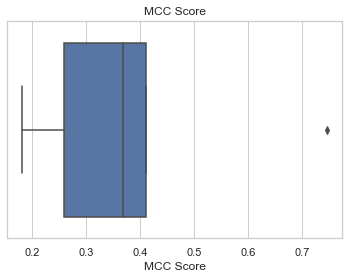

Matthews_corrcoef all:  [0.18136906252750293, 0.4107919181288746, 0.3685138655950444, 0.7453559924999299, 0.25819888974716115]
Matthews_corrcoef = 0.393 ± 0.194)


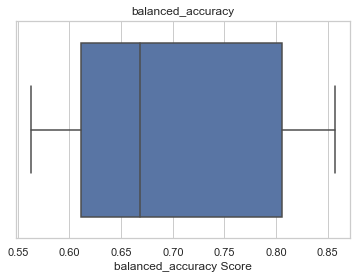

balanced_accuracy all:  [0.5625, 0.66875, 0.8055555555555556, 0.8571428571428572, 0.611111111111111]
balanced_accuracy = 0.70 ± 0.11)


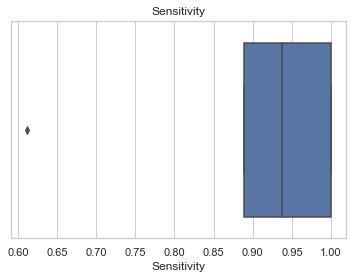

Sensitivity all:  [1.0, 0.9375, 0.6111111111111112, 1.0, 0.8888888888888888]
Sensitivity = 0.89 ± 0.14)


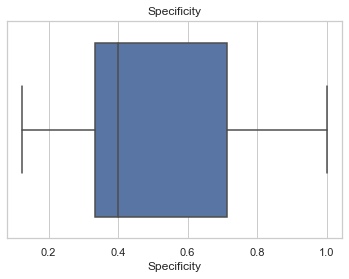

Specificity all:  [0.125, 0.4, 1.0, 0.7142857142857143, 0.3333333333333333]
Specificity = 0.51 ± 0.31)
One Combined Confusion Matrix
conf_matrix: 
  [[46  9]
 [21 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.84      0.75        55
         1.0       0.57      0.36      0.44        33

    accuracy                           0.66        88
   macro avg       0.63      0.60      0.60        88
weighted avg       0.64      0.66      0.64        88

matthews_corrcoef
0.22715445653021024
balanced_accuracy_score
0.6
Sensitivity
0.8363636363636363
Specificity
0.36363636363636365
AUC-ROC for the combined results: 


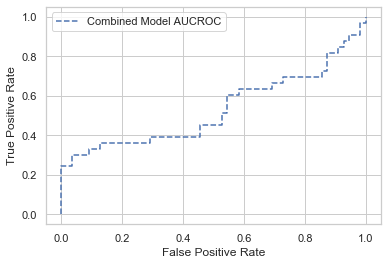

Combined Model AUC ROC:  0.5333333333333333
Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


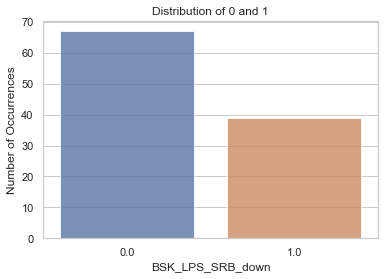

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


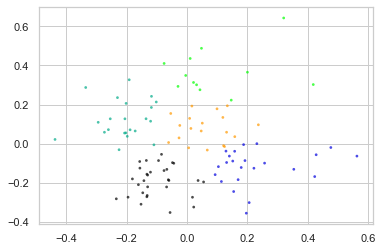

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


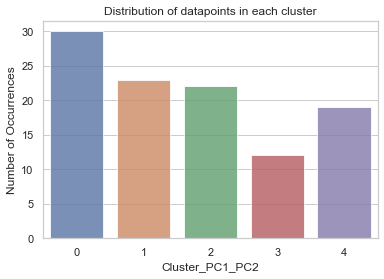

Total Selected CP features:  101
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13 12]
 [ 1  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.52      0.67        25
         1.0       0.25      0.80      0.38         5

    accuracy                           0.57        30
   macro avg       0.59      0.66      0.52        30
weighted avg       0.82      0.57      0.62        30

Total Selected CP features:  92
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  5]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79        18
         1.0       0.38      0.60      0.46         5

    accuracy                           0.70        23
   macro avg       0.62      0.66      0.62        23
weighted avg       0.76      0.70      0.72        23

Total Selected CP features:  244
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.30      1.00      0.46         6
         1.0       1.00      0.12      0.22        16

    accuracy                           0.36        22
   macro avg       0.65      0.56      0.34        22
weighted avg       0.81      0.36      0.29        22

Total Selected CP features:  80
Total Selected train:  87
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 2  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89        13
         1.0       0.80      0.67      0.73         6

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19

Total Selected CP features:  113
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 1]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.80      0.62         5
         1.0       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



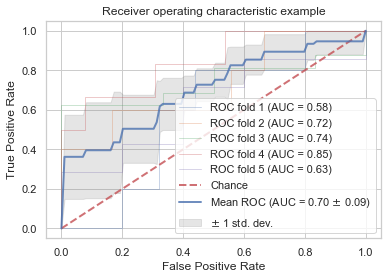

Mean of Each fold


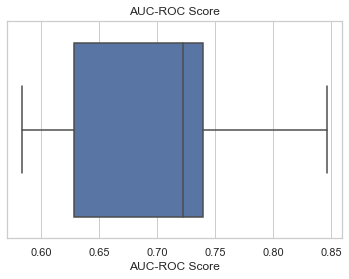

AUC-ROC all:  [0.5840000000000001, 0.7222222222222222, 0.7395833333333333, 0.8461538461538461, 0.6285714285714286]
AUC-ROC = 0.70 ± 0.09)


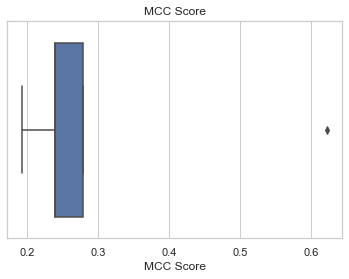

Matthews_corrcoef all:  [0.23904572186687872, 0.2790526301083191, 0.19364916731037085, 0.6225317562548818, 0.23904572186687872]
Matthews_corrcoef = 0.315 ± 0.156)


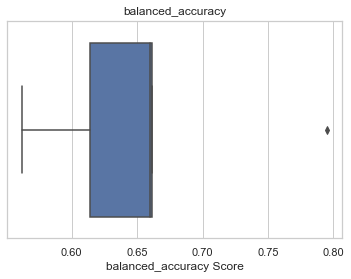

balanced_accuracy all:  [0.66, 0.6611111111111111, 0.5625, 0.7948717948717949, 0.6142857142857143]
balanced_accuracy = 0.66 ± 0.08)


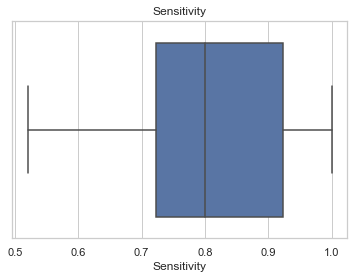

Sensitivity all:  [0.52, 0.7222222222222222, 1.0, 0.9230769230769231, 0.8]
Sensitivity = 0.79 ± 0.17)


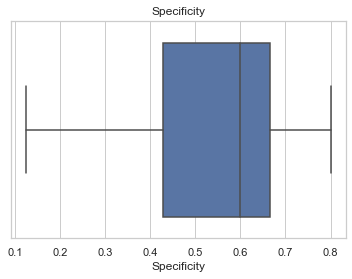

Specificity all:  [0.8, 0.6, 0.125, 0.6666666666666666, 0.42857142857142855]
Specificity = 0.52 ± 0.23)
One Combined Confusion Matrix
conf_matrix: 
  [[48 19]
 [23 16]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.68      0.72      0.70        67
         1.0       0.46      0.41      0.43        39

    accuracy                           0.60       106
   macro avg       0.57      0.56      0.56       106
weighted avg       0.60      0.60      0.60       106

matthews_corrcoef
0.12989579503060172
balanced_accuracy_score
0.5633371603520857
Sensitivity
0.7164179104477612
Specificity
0.41025641025641024
AUC-ROC for the combined results: 


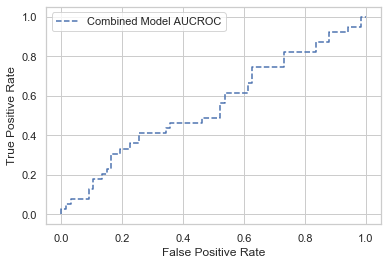

Combined Model AUC ROC:  0.5491771909682357
Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


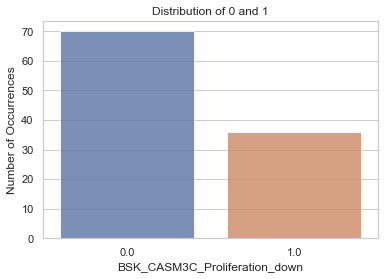

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


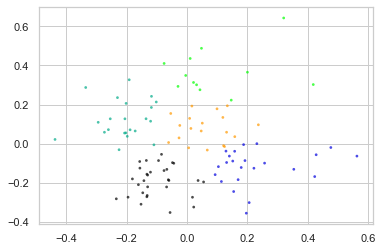

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


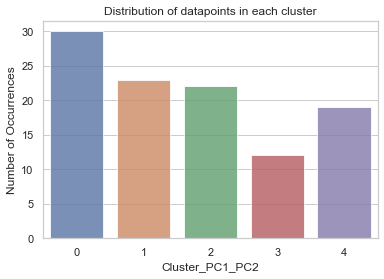

Total Selected CP features:  221
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[20  6]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.95      0.77      0.85        26
         1.0       0.33      0.75      0.46         4

    accuracy                           0.77        30
   macro avg       0.64      0.76      0.66        30
weighted avg       0.87      0.77      0.80        30

Total Selected CP features:  125
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 0  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        19
         1.0       0.57      1.00      0.73         4

    accuracy                           0.87        23
   macro avg       0.79      0.92      0.82        23
weighted avg       0.93      0.87      0.88        23

Total Selected CP features:  359
Total Selected train:  84

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  149
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.7min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.75      0.50      0.60         6

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19

Total Selected CP features:  79
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 0]
 [5 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      1.00      0.62         4
         1.0       1.00      0.38      0.55         8

    accuracy                           0.58        12
   macro avg       0.72      0.69      0.58        12
weighted avg       0.81      0.58      0.57        12



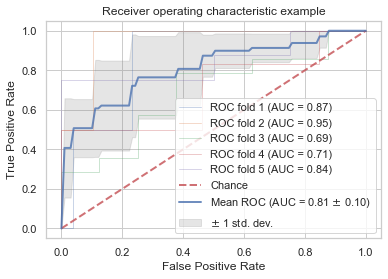

Mean of Each fold


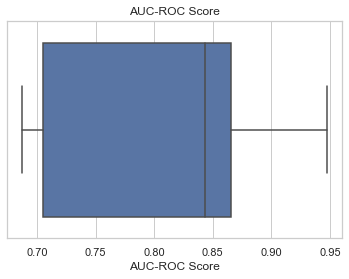

AUC-ROC all:  [0.8653846153846153, 0.9473684210526316, 0.6875, 0.7051282051282052, 0.84375]
AUC-ROC = 0.81 ± 0.10)


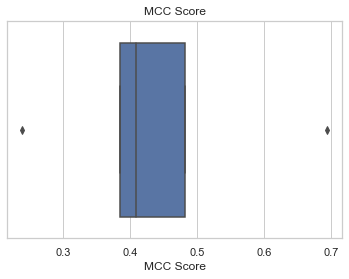

Matthews_corrcoef all:  [0.38516444325982163, 0.693687975619296, 0.23904572186687872, 0.48238191061886604, 0.408248290463863]
Matthews_corrcoef = 0.442 ± 0.149)


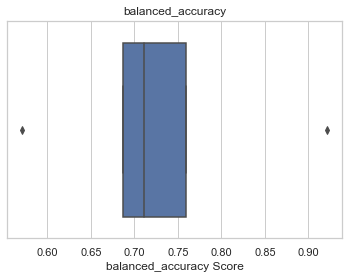

balanced_accuracy all:  [0.7596153846153846, 0.9210526315789473, 0.5714285714285714, 0.7115384615384616, 0.6875]
balanced_accuracy = 0.73 ± 0.11)


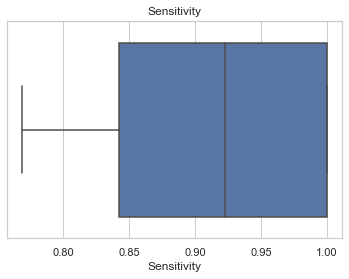

Sensitivity all:  [0.7692307692307693, 0.8421052631578947, 1.0, 0.9230769230769231, 1.0]
Sensitivity = 0.91 ± 0.09)


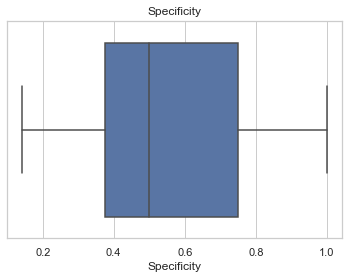

Specificity all:  [0.75, 1.0, 0.14285714285714285, 0.5, 0.375]
Specificity = 0.55 ± 0.30)
One Combined Confusion Matrix
conf_matrix: 
  [[60 10]
 [21 15]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.86      0.79        70
         1.0       0.60      0.42      0.49        36

    accuracy                           0.71       106
   macro avg       0.67      0.64      0.64       106
weighted avg       0.69      0.71      0.69       106

matthews_corrcoef
0.30544731127434505
balanced_accuracy_score
0.6369047619047619
Sensitivity
0.8571428571428571
Specificity
0.4166666666666667
AUC-ROC for the combined results: 


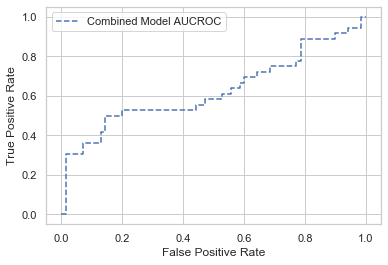

Combined Model AUC ROC:  0.626984126984127
Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


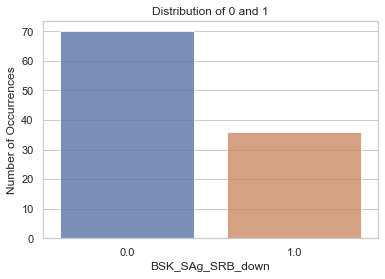

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


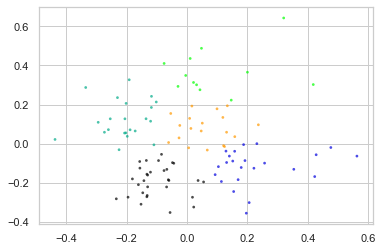

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


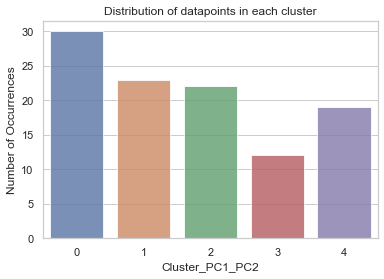

Total Selected CP features:  105
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  9]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.65      0.77        26
         1.0       0.25      0.75      0.38         4

    accuracy                           0.67        30
   macro avg       0.60      0.70      0.57        30
weighted avg       0.85      0.67      0.72        30

Total Selected CP features:  92
Total Selected train:  83


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   41.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  3]
 [ 3  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        19
         1.0       0.25      0.25      0.25         4

    accuracy                           0.74        23
   macro avg       0.55      0.55      0.55        23
weighted avg       0.74      0.74      0.74        23

Total Selected CP features:  262
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [15  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.29      1.00      0.44         6
         1.0       1.00      0.06      0.12        16

    accuracy                           0.32        22
   macro avg       0.64      0.53      0.28        22
weighted avg       0.81      0.32      0.21        22

Total Selected CP features:  80
Total Selected train:  87


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.67      0.40      0.50         5

    accuracy                           0.79        19
   macro avg       0.74      0.66      0.68        19
weighted avg       0.77      0.79      0.77        19

Total Selected CP features:  68
Total Selected train:  94


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 2]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.67      0.57      0.62         7

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



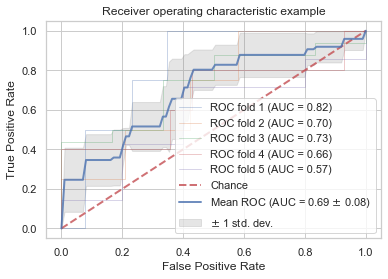

Mean of Each fold


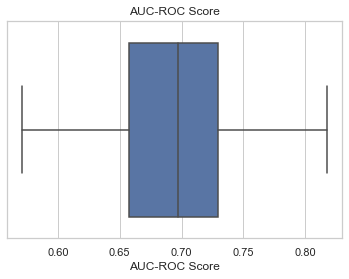

AUC-ROC all:  [0.8173076923076923, 0.6973684210526316, 0.7291666666666667, 0.6571428571428571, 0.5714285714285714]
AUC-ROC = 0.69 ± 0.08)


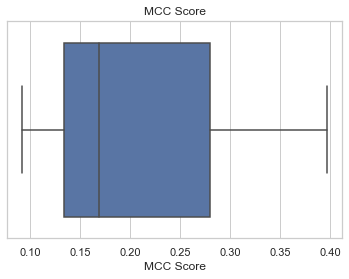

Matthews_corrcoef all:  [0.28022426915890253, 0.09210526315789473, 0.1336306209562122, 0.3967876966218537, 0.1690308509457033]
Matthews_corrcoef = 0.214 ± 0.111)


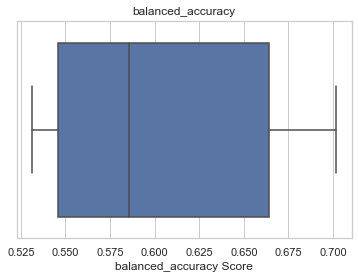

balanced_accuracy all:  [0.7019230769230769, 0.5460526315789473, 0.53125, 0.6642857142857144, 0.5857142857142856]
balanced_accuracy = 0.61 ± 0.07)


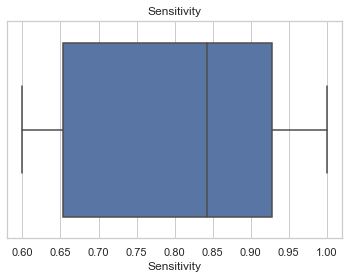

Sensitivity all:  [0.6538461538461539, 0.8421052631578947, 1.0, 0.9285714285714286, 0.6]
Sensitivity = 0.80 ± 0.15)


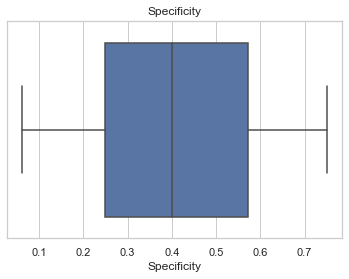

Specificity all:  [0.75, 0.25, 0.0625, 0.4, 0.5714285714285714]
Specificity = 0.41 ± 0.24)
One Combined Confusion Matrix
conf_matrix: 
  [[55 15]
 [25 11]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.79      0.73        70
         1.0       0.42      0.31      0.35        36

    accuracy                           0.62       106
   macro avg       0.56      0.55      0.54       106
weighted avg       0.60      0.62      0.60       106

matthews_corrcoef
0.10046063018585051
balanced_accuracy_score
0.5456349206349207
Sensitivity
0.7857142857142857
Specificity
0.3055555555555556
AUC-ROC for the combined results: 


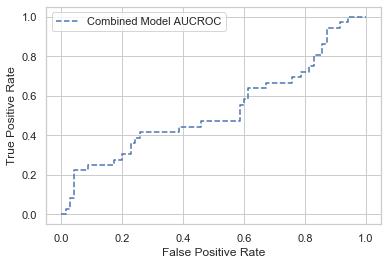

Combined Model AUC ROC:  0.5277777777777778
Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


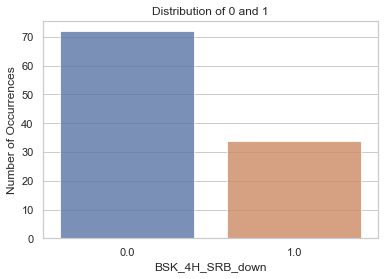

Total Compounds in Assay:  106
106
106
pca explained variance by first two components:  0.7210227204267772


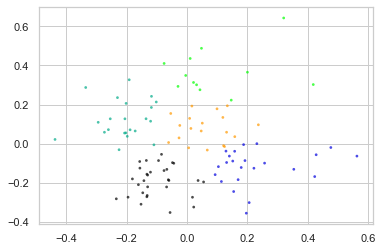

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


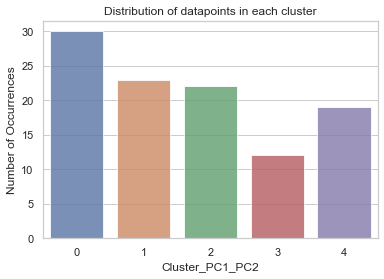

Total Selected CP features:  173
Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[20  5]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85        25
         1.0       0.38      0.60      0.46         5

    accuracy                           0.77        30
   macro avg       0.64      0.70      0.66        30
weighted avg       0.82      0.77      0.79        30

Total Selected CP features:  225
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  2]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        19
         1.0       0.60      0.75      0.67         4

    accuracy                           0.87        23
   macro avg       0.77      0.82      0.79        23
weighted avg       0.88      0.87      0.88        23

Total Selected CP features:  465
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         8
         1.0       1.00      0.14      0.25        14

    accuracy                           0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22

Total Selected CP features:  251
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        13
         1.0       0.67      0.33      0.44         6

    accuracy                           0.74        19
   macro avg       0.71      0.63      0.64        19
weighted avg       0.72      0.74      0.71        19

Total Selected CP features:  181
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 1]
 [1 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



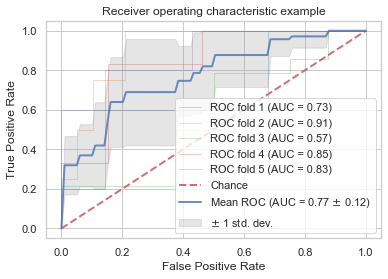

Mean of Each fold


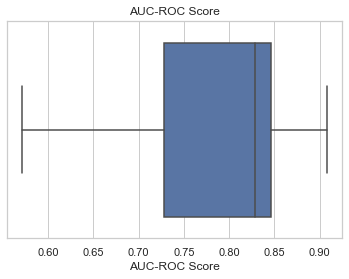

AUC-ROC all:  [0.728, 0.9078947368421053, 0.5714285714285714, 0.8461538461538461, 0.8285714285714285]
AUC-ROC = 0.78 ± 0.12)


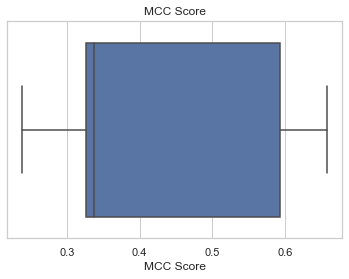

Matthews_corrcoef all:  [0.337099931231621, 0.5924722709231762, 0.23904572186687872, 0.3268602252303067, 0.6571428571428571]
Matthews_corrcoef = 0.431 ± 0.164)


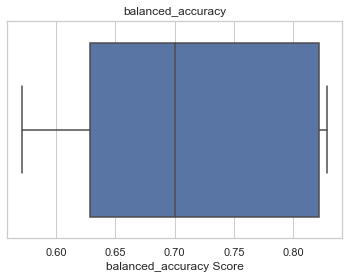

balanced_accuracy all:  [0.7, 0.8223684210526316, 0.5714285714285714, 0.6282051282051282, 0.8285714285714285]
balanced_accuracy = 0.71 ± 0.10)


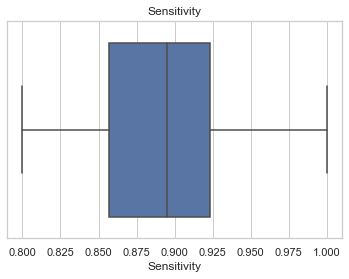

Sensitivity all:  [0.8, 0.8947368421052632, 1.0, 0.9230769230769231, 0.8571428571428571]
Sensitivity = 0.89 ± 0.07)


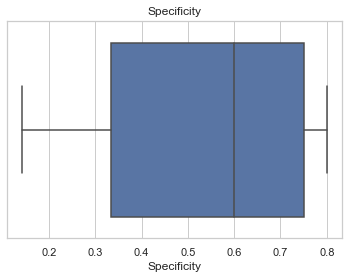

Specificity all:  [0.6, 0.75, 0.14285714285714285, 0.3333333333333333, 0.8]
Specificity = 0.53 ± 0.25)
One Combined Confusion Matrix
conf_matrix: 
  [[63  9]
 [20 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.81        72
         1.0       0.61      0.41      0.49        34

    accuracy                           0.73       106
   macro avg       0.68      0.64      0.65       106
weighted avg       0.71      0.73      0.71       106

matthews_corrcoef
0.3247345077740297
balanced_accuracy_score
0.6433823529411764
Sensitivity
0.875
Specificity
0.4117647058823529
AUC-ROC for the combined results: 


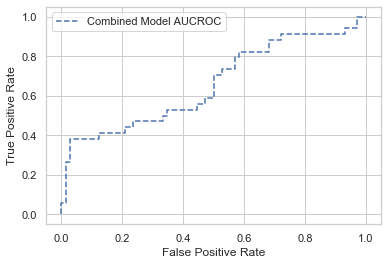

Combined Model AUC ROC:  0.6593137254901961
Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


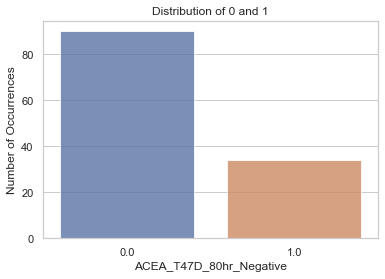

Total Compounds in Assay:  124
124
124
pca explained variance by first two components:  0.7273896354684481


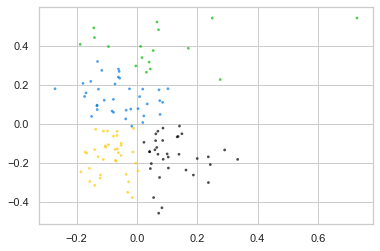

Start
1    37
3    36
0    34
2    17
Name: Cluster_PC1_PC2, dtype: int64


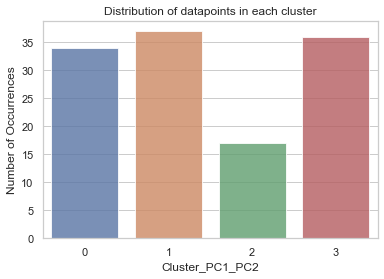

Total Selected CP features:  271
Total Selected train:  87
Total Selected test:  37
Fitting 4 folds for each of 768 candidates, totalling 3072 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   47.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  1]
 [13  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.95      0.73        20
         1.0       0.80      0.24      0.36        17

    accuracy                           0.62        37
   macro avg       0.70      0.59      0.55        37
weighted avg       0.69      0.62      0.56        37

Total Selected CP features:  245
Total Selected train:  88


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.2min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[28  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        29
         1.0       0.50      0.14      0.22         7

    accuracy                           0.81        36
   macro avg       0.66      0.55      0.56        36
weighted avg       0.76      0.81      0.76        36

Total Selected CP features:  215
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   46.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.2min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[27  5]
 [ 1  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        32
         1.0       0.17      0.50      0.25         2

    accuracy                           0.82        34
   macro avg       0.57      0.67      0.57        34
weighted avg       0.92      0.82      0.86        34

Total Selected CP features:  66
Total Selected train:  1

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   23.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   45.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [6 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         9
         1.0       1.00      0.25      0.40         8

    accuracy                           0.65        17
   macro avg       0.80      0.62      0.57        17
weighted avg       0.79      0.65      0.59        17



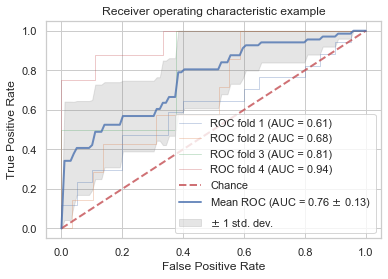

Mean of Each fold


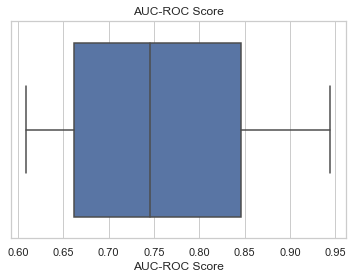

AUC-ROC all:  [0.6088235294117648, 0.6798029556650247, 0.8125, 0.9444444444444444]
AUC-ROC = 0.76 ± 0.13)


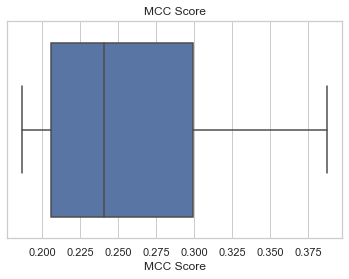

Matthews_corrcoef all:  [0.27011027159945145, 0.18724930115325378, 0.21216710619787638, 0.3872983346207417]
Matthews_corrcoef = 0.264 ± 0.077)


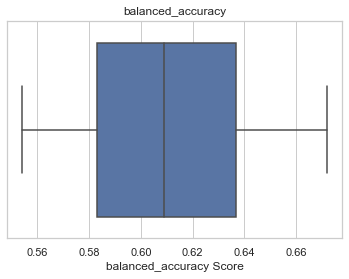

balanced_accuracy all:  [0.5926470588235294, 0.5541871921182266, 0.671875, 0.625]
balanced_accuracy = 0.61 ± 0.04)


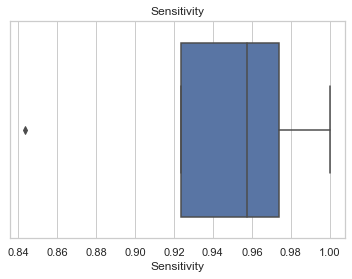

Sensitivity all:  [0.95, 0.9655172413793104, 0.84375, 1.0]
Sensitivity = 0.94 ± 0.06)


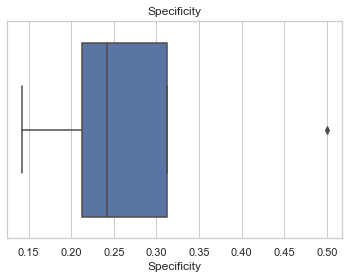

Specificity all:  [0.23529411764705882, 0.14285714285714285, 0.5, 0.25]
Specificity = 0.28 ± 0.13)
One Combined Confusion Matrix
conf_matrix: 
  [[83  7]
 [26  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.92      0.83        90
         1.0       0.53      0.24      0.33        34

    accuracy                           0.73       124
   macro avg       0.65      0.58      0.58       124
weighted avg       0.70      0.73      0.69       124

matthews_corrcoef
0.21549016143202945
balanced_accuracy_score
0.5787581699346406
Sensitivity
0.9222222222222223
Specificity
0.23529411764705882
AUC-ROC for the combined results: 


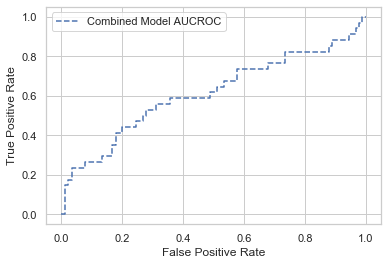

Combined Model AUC ROC:  0.6124183006535947


In [45]:
list_of_lists = []

for col in tox_list:
    
    method = "ErG+CP_KS_0.02"
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['ErGFingerprint'] =df_temp['smiles_r'].apply(ErGFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    
    X_erg = np.array([x for x in df_temp['ErGFingerprint']])
    
    
    data=df_temp 
    data=data.drop('ErGFingerprint', axis = 1)
    data=data.drop('smiles_r', axis = 1)
    

    
    X_CP, y = data.loc[:, data.columns != target], data[target]

    X_CP=X_CP.to_numpy()
    
    y=y.to_numpy()
        
    print("Total Compounds in Assay: ", len(y))
    X= np.concatenate((X_CP, X_erg ), axis=1)
    
    print(len(X))
    print(len(y))
    
    
    #PCA to groups
    
    df_temp['MolWt']=df_temp['smiles_r'].apply(GetExactMolWt)
    df_temp['TPSA']=df_temp['smiles_r'].apply(GetCalcTPSA) #Topological Polar Surface Area
    df_temp['nRotB']=df_temp['smiles_r'].apply(GetNumRotatableBonds) #Number of rotable bonds
    df_temp['HBD']=df_temp['smiles_r'].apply(GetNumHDonors) #Number of H bond donors
    df_temp['HBA']=df_temp['smiles_r'].apply(GetNumHAcceptors) #Number of H bond acceptors
    df_temp['LogP']=df_temp['smiles_r'].apply(GetMolLogP) #LogP

    descriptors = df_temp.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values
    descriptors_std = StandardScaler().fit_transform(descriptors)
    
    pca = PCA()
    descriptors_2d = pca.fit_transform(descriptors_std)
    descriptors_pca= pd.DataFrame(descriptors_2d)
    descriptors_pca.index = df_temp.index
    descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

    print("pca explained variance by first two components: ", (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]))

    # This normalization will be performed just for PC1 and PC2, but can be done for all the components.
    scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
    scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

    # And we add the new values to our PCA table
    descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
    descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    
  
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    plt.show()
    
    
    df_temp['Cluster_PC1_PC2'] = pd.Series(kmeans.labels_, index=df_temp.index)
    print("Start")
    cluster_counts=df_temp['Cluster_PC1_PC2'].value_counts()
    print(df_temp['Cluster_PC1_PC2'].value_counts())
    plt.figure()
    sns.barplot(cluster_counts.index, cluster_counts.values, alpha=0.8)
    plt.title('Distribution of datapoints in each cluster')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Cluster_PC1_PC2', fontsize=12)
    plt.show()
    
    
    outercv = GroupKFold(n_splits=n_cluster)
    outercv.get_n_splits(X, y, kmeans.labels_)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y, kmeans.labels_)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_erg=X_train[:, 1766:]
        X_test_erg=X_test[:, 1766:]
        
        rows_train_CP= np.concatenate((X_train[:, :1766], y_train[:,None]),axis=1)
        new_df_train_CP = pd.DataFrame(rows_train_CP, columns=data.columns)
        
        rows_test_CP= np.concatenate((X_test[:, :1766], y_test[:,None]),axis=1)
        new_df_test_CP = pd.DataFrame(rows_test_CP, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train_CP.columns:
        
            inactives=new_df_train_CP[num][new_df_train_CP[target]==0]
            actives=new_df_train_CP[num][new_df_train_CP[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data_CP=new_df_train_CP[col_list]
        test_data_CP=new_df_test_CP[col_list]
    
        X_train_CP= train_data_CP.loc[:, train_data_CP.columns != target]
        X_train_CP=X_train_CP.to_numpy()
        
        X_test_CP= test_data_CP.loc[:, test_data_CP.columns != target]
        X_test_CP=X_test_CP.to_numpy()
        
        X_train= np.concatenate((X_train_CP, X_train_erg ), axis=1)
        X_test= np.concatenate((X_test_CP, X_test_erg ), axis=1)
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=n_cluster, shuffle=True, random_state=0)
               
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs =40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print(grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    
    
    
    
    
    print("Mean of Each fold")
    
    sns.boxplot(x=aucs).set(title = 'AUC-ROC Score', xlabel = 'AUC-ROC Score' )
    plt.show()
    print("AUC-ROC all: ",(aucs))
    print(r"AUC-ROC = %0.2f ± %0.2f)" % (np.mean(aucs), np.std(aucs)))
    row=[col, method, 'AUC-ROC'] + aucs
    list_of_lists.append(row)
    sns.set(style="whitegrid")    
    
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print(r"Matthews_corrcoef = %0.3f ± %0.3f)" % (np.mean(mat_cof), np.std(mat_cof)))
    row=[col, method, 'MCC'] + mat_cof
    list_of_lists.append(row)
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print(r"balanced_accuracy = %0.2f ± %0.2f)" % (np.mean(ba), np.std(ba)))
    row=[col, method, 'BA'] + ba
    list_of_lists.append(row)
    
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print(r"Sensitivity = %0.2f ± %0.2f)" % (np.mean(sen), np.std(sen)))
    row=[col, method, 'SEN'] + sen
    list_of_lists.append(row)
    
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print(r"Specificity = %0.2f ± %0.2f)" % (np.mean(spe), np.std(spe)))
    row=[col, method, 'SPE'] + spe
    list_of_lists.append(row)
    
    
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    print(matthews_corrcoef(combined_y_test, combined_y_pred))
    
    print('balanced_accuracy_score')
    print(balanced_accuracy_score(combined_y_test, combined_y_pred))
    
    print('Sensitivity')   
    print(combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1]))
    
    print('Specificity')  
    print(combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1]))
       
    print("AUC-ROC for the combined results: ")
    
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("Combined Model AUC ROC: ", roc_value_combined_model)

In [46]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "metric", "1", "2", "3", "4", "5"])
df['mean']=df.drop(['target', 'method', 'metric'], axis=1).apply(lambda x: x.mean(), axis=1)
df['std']=df.drop(['target', 'method','metric'], axis=1).apply(lambda x: x.std(), axis=1)
df['value']= df['mean'].round(2).astype(str) + " ± " + df['std'].round(2).astype(str)

In [47]:
df

,target,method,metric,1,2,3,4,5,mean,std,value
0,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,AUC-ROC,0.625000,0.784314,0.523810,0.600000,0.909091,0.688443,0.139160,0.69 ± 0.14
1,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,MCC,0.000000,0.321314,0.118345,0.069007,0.356753,0.173084,0.141062,0.17 ± 0.14
2,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,BA,0.500000,0.681373,0.619048,0.533333,0.818182,0.630387,0.113503,0.63 ± 0.11
3,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,SEN,0.000000,0.529412,1.000000,0.666667,1.000000,0.639216,0.369253,0.64 ± 0.37
4,BSK_hDFCGF_Proliferation_down,ErG+CP_KS_0.02,SPE,1.000000,0.833333,0.238095,0.400000,0.636364,0.621558,0.277279,0.62 ± 0.28
5,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,AUC-ROC,0.796296,0.583333,0.666667,0.575758,0.843750,0.693161,0.109418,0.69 ± 0.11
6,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,MCC,0.166667,0.055048,0.098513,-0.025950,0.478091,0.154474,0.173463,0.15 ± 0.17
7,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,BA,0.583333,0.527778,0.568627,0.484848,0.750000,0.582917,0.090309,0.58 ± 0.09
8,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,SEN,1.000000,0.500000,0.470588,0.333333,0.750000,0.610784,0.236549,0.61 ± 0.24
9,APR_HepG2_CellLoss_72h_dn,ErG+CP_KS_0.02,SPE,0.166667,0.555556,0.666667,0.636364,0.750000,0.555051,0.203920,0.56 ± 0.2


In [48]:
file_name="Metrics_"+method+".csv"
df.to_csv(file_name)